### Morphological Transformations

Morphological operations are one of the Image processing techniques that processes image based on shape. This processing strategy is usually performed on binary images. <br>
Common Morphological Transformations are:

1) Erosion<br>
2) Dilation<br>
3) Opening<br>
4) Closing<br>
5) Morphological Gradient<br>
6) Top hat<br>
7) Black hat<br>

### Erosion
<p>It erodes away the boundaries of foreground object. The kernel slides through the image (as in 2D convolution).A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero). <b>Note </b>- The foreground is preferred to be white. <br>
Function used <b>cv2.erode(src, kernel,iterations)</b></p>

1) Erodes away the boundaries of the foreground object<br>
2) Used to diminish the features of an image.<br>
3) It is useful for removing small white noises.<br>
4) Used to detach two connected objects etc.<br>
5) Used for object counting<br>


### Dilation
<p>
It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So 
it increases the white region in the image or size of foreground object increases. Normally, in cases like noise 
removal, erosion is followed by dilation.<b> Note </b>- The foreground is preferred to be white.<br>
Function used <b>cv2.dilate(src, kernel,iterations)</b>    
</p>

1) Increases the object area<br>
2) Used to accentuate features<br>
3) In cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases.<br>
4) It is also useful in joining broken parts of an object.

### Structuring Element (Kernel)
An essential part of the morphological dilation and erosion operations is the structuring element used to probe the input image. A structuring element is a matrix that identifies the pixel in the image being processed and defines the neighborhood used in the processing of each pixel.

The erosion operator takes two pieces of data as inputs. The first is the image which is to be eroded. The second is a (usually small) set of coordinate points known as a structuring element (also known as a kernel). It is this structuring element that determines the precise effect of the erosion on the input image. 

To compute the erosion of a binary input image by this structuring element, we consider each of the foreground pixels in the input image in turn. For each foreground pixel (which we will call the input pixel) we superimpose the structuring element on top of the input image so that the origin of the structuring element coincides with the input pixel coordinates. If for every pixel in the structuring element, the corresponding pixel in the image underneath is a foreground pixel, then the input pixel is left as it is. If any of the corresponding pixels in the image are background, however, the input pixel is also set to background value. 

<img src="structuring_element.png" height="150" width="150">
<img src="erosion1.png">

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

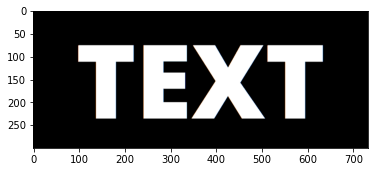

In [2]:
a1 = cv2.imread('text1.png')
plt.imshow(a1)
plt.show()

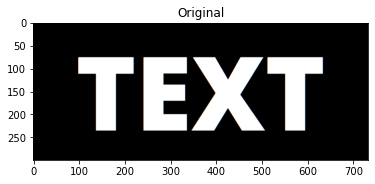

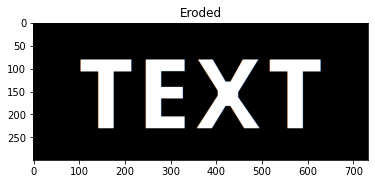

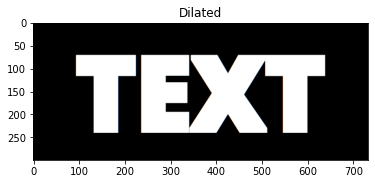

In [4]:
k = np.ones((3,3))
er1 = cv2.erode(a1,k,iterations=5)
dil1 = cv2.dilate(a1,k,iterations=5)

plt.imshow(a1),plt.title('Original'),plt.show()
plt.imshow(er1),plt.title('Eroded'),plt.show()
plt.imshow(dil1),plt.title('Dilated'),plt.show()
plt.show()

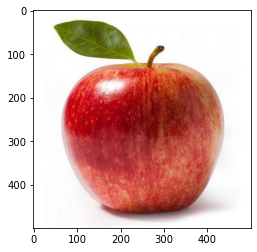

In [16]:
a2 = cv2.imread('apple.jpg')
a2_col = cv2.cvtColor(a2,cv2.COLOR_BGR2RGB)
a2_gray = cv2.cvtColor(a2,cv2.COLOR_BGR2GRAY)
plt.imshow(a2_col)
plt.show()

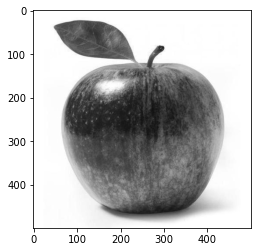

In [17]:
plt.imshow(a2_gray,'gray')
plt.show()

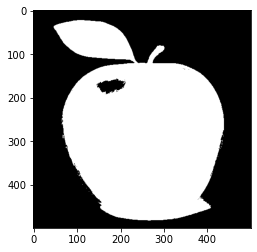

In [14]:
_ , t1 = cv2.threshold(a2_gray,200,255,cv2.THRESH_BINARY_INV)
plt.imshow(t1,'gray')
plt.show()

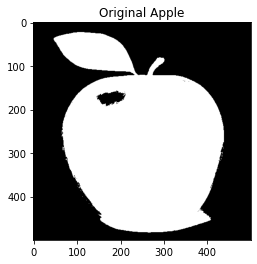

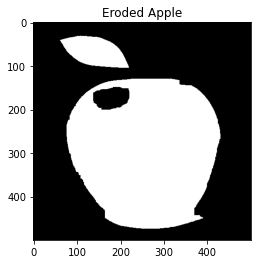

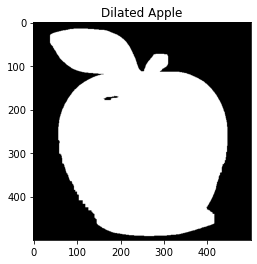

In [22]:
k = np.ones((3,3))
er1 = cv2.erode(t1, k, iterations=8)
dil1 = cv2.dilate(t1, k, iterations=8)

plt.imshow(t1,'gray'),plt.title('Original Apple'),plt.show()
plt.imshow(er1,'gray'),plt.title('Eroded Apple'),plt.show()
plt.imshow(dil1,'gray'),plt.title('Dilated Apple'),plt.show()
plt.show()

### Opening
<p>Opening is just another name of erosion followed by dilation. It is used in removing noise.<br> Function used :-<b> cv2.morphologyEx()</b> with argument <b>cv2.MORPH_OPEN</b></p>
    
### Closing
<p>
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the 
foreground objects, or small black points on the object.<br>
Function used :-<b> cv2.morphologyEx()</b> with argument <b>cv2.MORPH_CLOSE</b>
</p>

Opening - Erosion followed by dilation<br>
Closing - Dilation followed by Erosion

Example Syntax<br>
cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel,iterations)

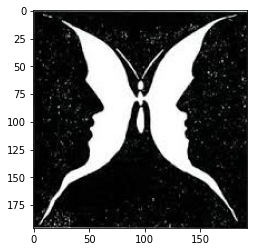

In [23]:
a3 = cv2.imread('bfly1.jpg')
plt.imshow(a3)
plt.show()

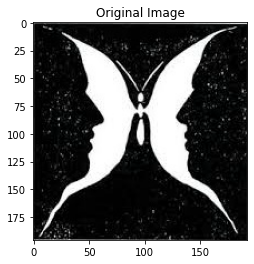

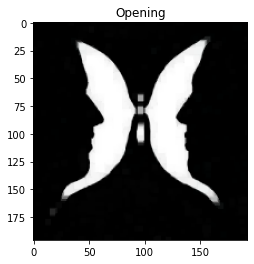

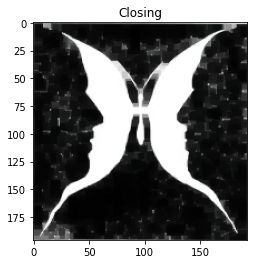

In [26]:
k1 = np.ones((5,5))
opening = cv2.morphologyEx(a3,cv2.MORPH_OPEN,k1,iterations=1)
closing = cv2.morphologyEx(a3,cv2.MORPH_CLOSE,k1,iterations=1)

plt.imshow(a3),plt.title('Original Image'),plt.show()
plt.imshow(opening),plt.title('Opening'),plt.show()
plt.imshow(closing),plt.title('Closing'),plt.show()
plt.show()

### Morphological Gradient

The morphological gradient first applies erosion and dilation individually on the image and then computes the difference between the dilated and eroded image. The output will be an outline of the given image.

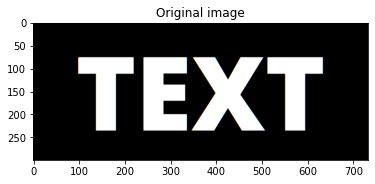

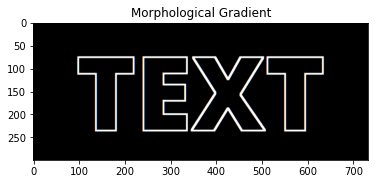

In [28]:
k2 = np.ones((3,3))
morph_gr = cv2.morphologyEx(a1,cv2.MORPH_GRADIENT,k2,iterations=2)
plt.imshow(a1),plt.title('Original image'),plt.show()
plt.imshow(morph_gr),plt.title('Morphological Gradient'),plt.show()
plt.show()

### Countour Detection (Boundary Detection)

When we join all the points on the boundary of an object, we get a contour. Typically, a specific contour refers to boundary pixels that have the same color and intensity<br>
There are 2 functions:<br>
a) findContours()<br>
b) drawContours()

Modes<br>
RETR_LIST<br>
RETR_EXTERNAL<br>
RETR_TREE<br>
etc

Algo Used<br>
CHAIN_APPROX_SIMPLE<br>
CHAIN_APPROX_NONE<br>

Example<br>
contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)<br>
res = cv2.drawContours(img, contours, -1, color, thickness)


More about Modes and algorithm used <br>
https://learnopencv.com/contour-detection-using-opencv-python-c/


#### Steps of Contour Detection

1) Read the Image and convert it to Grayscale Format<br>
2) Apply Binary Thresholding<br>
3) Find the contours<br>
4) Draw the contours<br>

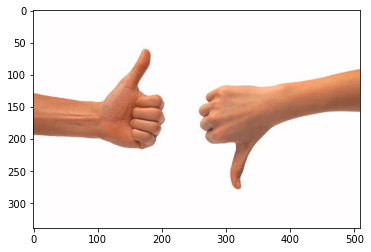

In [29]:
a4 = cv2.imread('thumbs.jpg')
a4_col = cv2.cvtColor(a4,cv2.COLOR_BGR2RGB)
a4_gray = cv2.cvtColor(a4,cv2.COLOR_BGR2GRAY)
plt.imshow(a4_col)
plt.show()

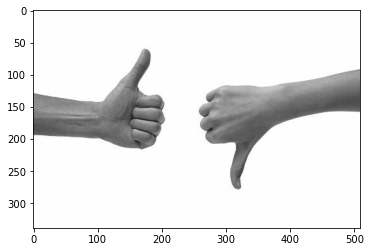

In [31]:
plt.imshow(a4_gray,'gray')
plt.show()

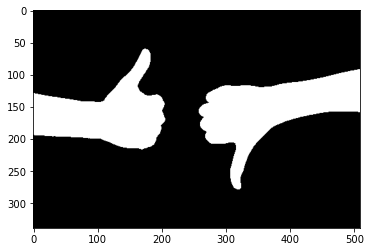

In [41]:
_,t2 = cv2.threshold(a4_gray,220,255,cv2.THRESH_BINARY_INV)
plt.imshow(t2,'gray')
plt.show()

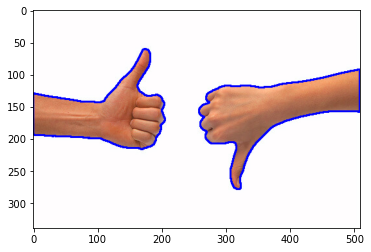

In [42]:
contours, hier = cv2.findContours(t2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
res = cv2.drawContours(a4_col, contours, -1, (0,0,255), 2)
plt.imshow(res)
plt.show()

### Counting

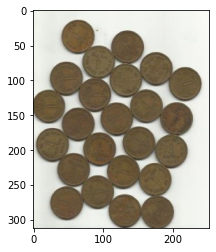

In [67]:
h1 = cv2.imread('coins.jpg')
h1_col = cv2.cvtColor(h1,cv2.COLOR_BGR2RGB)
h1_gray = cv2.cvtColor(h1,cv2.COLOR_BGR2GRAY)
plt.imshow(h1_col)
plt.show()

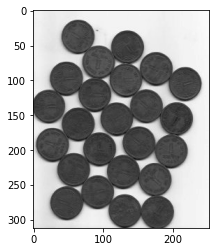

In [68]:
plt.imshow(h1_gray,'gray')
plt.show()

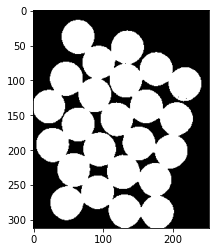

In [69]:
_,t3 = cv2.threshold(h1_gray,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(t3,'gray')
plt.show()

In [63]:
erode = erosion.copy()

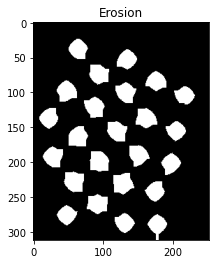

In [70]:
kernel = np.ones((3,3))
erosion = cv2.erode(t3,kernel,iterations = 8) 
plt.imshow(erosion,'gray')
plt.title('Erosion')
plt.show()

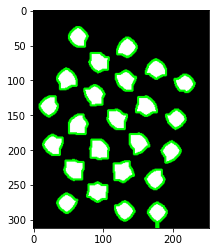

In [65]:
(cnt, hier) = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(erode, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
plt.imshow(rgb)
plt.show()

In [73]:
c = 0
for i in cnt:
    c+=1
print(c)

24
